In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [13]:
df = pd.read_csv("../data/raw/Telco-Customer-Churn.csv")

In [29]:
print("Shape before cleaning:", df.shape)
df.info()

Shape before cleaning: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperles

In [31]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])
print("Shape after cleaning:", df.shape)

Shape after cleaning: (7032, 21)


In [32]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [33]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [34]:
df.duplicated().sum()

np.int64(0)

### Target Distribution

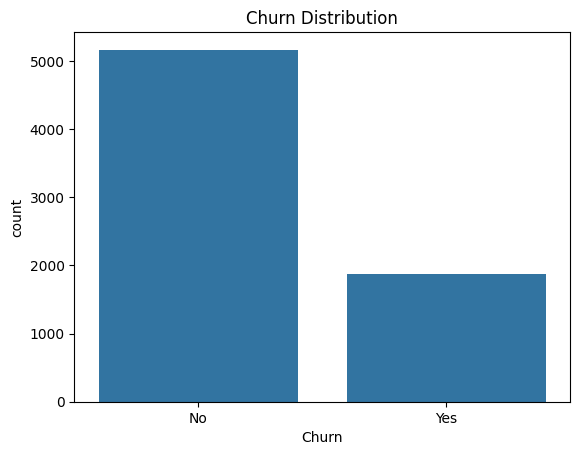

In [35]:
sns.countplot(x=df['Churn'])
plt.title("Churn Distribution")
plt.savefig("../reports/figures/churn_distribution.png", dpi=300)
plt.show()

### Distribution of MonthlyCharges 

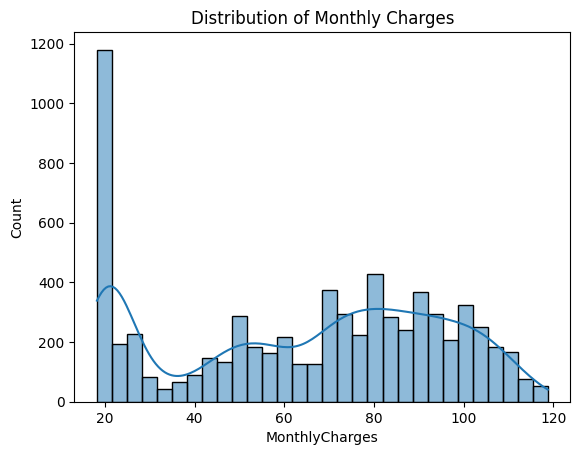

In [36]:
sns.histplot(df['MonthlyCharges'], kde=True, bins=30)
plt.title("Distribution of Monthly Charges")
plt.savefig("../reports/figures/monthlycharges_distribution.png")
plt.show()

### Correlation heatmap

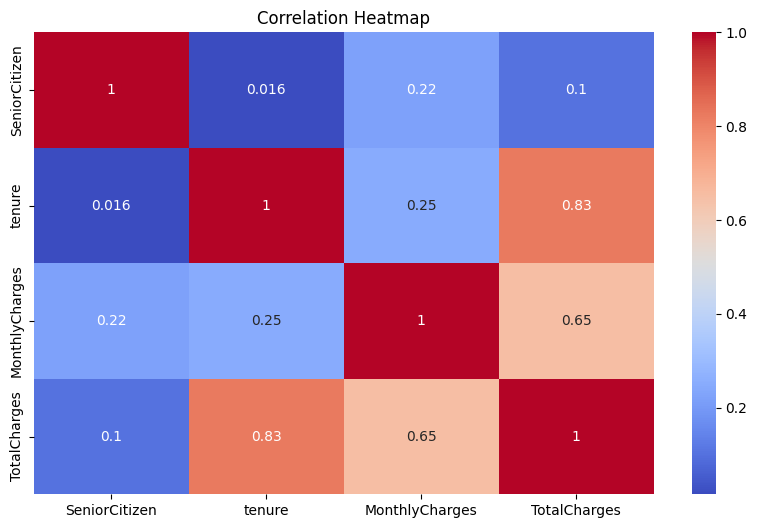

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.savefig("../reports/figures/correlation_heatmap.png")
plt.show()

In [41]:
#Cleaned dataset

df.to_csv("../data/processed/telco_clean.csv", index=False)